## Describing the Raw Data

 - Number of features
 - Number of records
 - Variable types
 - etc.

[Data Source](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv)



#### Read in Libraries and the raw data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

raw_data = pd.read_csv("Data\metadata.csv")

C:\Users\ear51\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Data Understanding

In [2]:
raw_data.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [3]:
print("Numer of columns:", len(raw_data.columns))
print("Number of row entries by column:\n")
print(raw_data.count())

Numer of columns: 19
Number of row entries by column:

cord_uid            253454
sha                 100094
source_x            253454
title               253387
doi                 164740
pmcid               105976
pubmed_id           144374
license             253454
abstract            179605
publish_time        253395
authors             245819
journal             237800
mag_id                   0
who_covidence_id     73792
arxiv_id              3337
pdf_json_files      100094
pmc_json_files       77321
url                 179830
s2_id               220770
dtype: int64


In [4]:
raw_data.isnull().sum()  # missing values by column

cord_uid                 0
sha                 153360
source_x                 0
title                   67
doi                  88714
pmcid               147478
pubmed_id           109080
license                  0
abstract             73849
publish_time            59
authors               7635
journal              15654
mag_id              253454
who_covidence_id    179662
arxiv_id            250117
pdf_json_files      153360
pmc_json_files      176133
url                  73624
s2_id                32684
dtype: int64

In [5]:
print("Number of unique journals:", raw_data.journal.nunique())
print("\n\nNumber of unique titles:", raw_data.title.nunique())
print("\n\nNumber of unique abstracts:", raw_data.abstract.nunique())

Number of unique journals: 21409


Number of unique titles: 212737


Number of unique abstracts: 161101


#### Check Data Types

In [6]:
dataTypeSeries = raw_data.dtypes
print("Data type of each column of Dataframe :")
print(dataTypeSeries)

Data type of each column of Dataframe :
cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object


In [7]:
raw_data = raw_data.sort_values(by='publish_time', ascending=False)
raw_data.publish_time.head()

88410     2021-12-31
88575     2021-12-31
203980    2021-12-31
94445     2021-08-01
94797     2021-04-01
Name: publish_time, dtype: object

In [8]:
raw_data = raw_data.sort_values(by='publish_time', ascending=True)
raw_data.publish_time.head()

98208     1816
96376     1870
94165     1874
97282     1884
101769    1885
Name: publish_time, dtype: object

In [9]:
print("Number of unique publication dates in raw data:", raw_data.publish_time.nunique())
print("Publish Dates frequencies:\n")
print(raw_data.publish_time.value_counts())

Number of unique publication dates in raw data: 7317
Publish Dates frequencies:

2020          74821
2015           3867
2016           3731
2017           3542
2014           3537
              ...  
1999-01-21        1
1997-07-18        1
2004-05-13        1
2002-01-31        1
1987-02-11        1
Name: publish_time, Length: 7317, dtype: int64


In [10]:
df = raw_data[['publish_time']]
df['year'] = df['publish_time'].astype(str).str[0:4]
print("Number of unique years in raw data:", df.year.nunique())
print("Publish Years frequencies:\n")
print(df.year.value_counts())

Number of unique years in raw data: 97
Publish Years frequencies:

2020    162894
2019      7568
2016      7524
2015      7205
2017      7186
         ...  
1960         1
1956         1
1953         1
1874         1
1870         1
Name: year, Length: 97, dtype: int64


C:\Users\ear51\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df = df.apply(pd.to_numeric, args=('coerce',))
df = df.dropna(subset=['year']) #drop records with missing values
df['year'] = df['year'].astype(int)
df.head()

,publish_time,year
98208,1816.0,1816
96376,1870.0,1870
94165,1874.0,1874
97282,1884.0,1884
101769,1885.0,1885


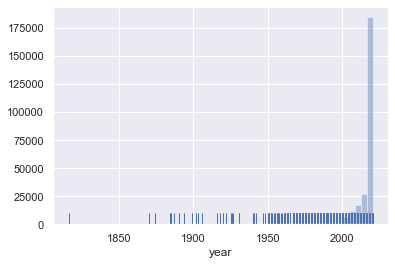

In [12]:
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(df['year'], kde=False, rug=True)

#### Observation about the date of publication
There seems to be publications without the full date details (i.e., missing day and/or month). Additionally, there appears to be dates from a long long time ago that may need to be removed due to potential irrelevance.

#### Convert publish_time to date type

In [13]:
raw_data['publish_time'] = pd.to_datetime(raw_data['publish_time'])

In [14]:
raw_data.publish_time.head()

98208    1816-01-01
96376    1870-01-01
94165    1874-01-01
97282    1884-01-01
101769   1885-01-01
Name: publish_time, dtype: datetime64[ns]

In [15]:
print("Min date:", min(raw_data['publish_time'])) #min date
print("\n\nMax date:", max(raw_data['publish_time'])) #max date

Min date: 1816-01-01 00:00:00


Max date: 2021-12-31 00:00:00
